<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


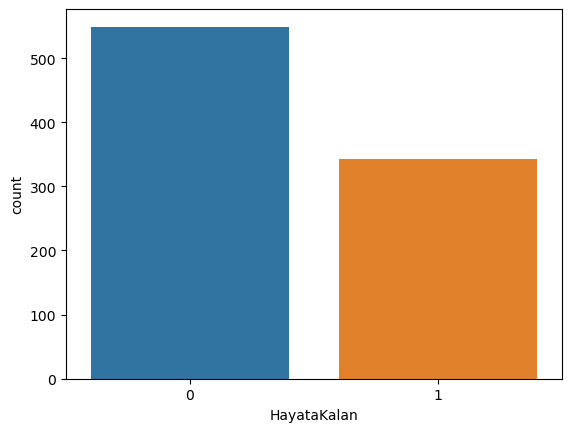

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
#train_data
train_data.info()
train_data.rename(columns={
    'PassengerId':'ID',
    'Survived':'HayataKalan',
    'Pclass':'Sınıf',
    'Name':'Isim',
    'Sex':'Cinsiyet',
    'Age':'Yas',
    'SibSp':'Eş',
    'Parch':'Aile Üyesi',
    'Ticket':'Bilet',
    'Fare':'Ücret',
    'Cabin':'Kabin',
    'Embarked':'GirişKapısı',
},inplace=True)
train_data.columns
sns.countplot(x='HayataKalan',data=train_data)
plt.show()

C:\Users\yakup\AppData\Local\Temp\ipykernel_1400\3924195170.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Yas'])


<Axes: xlabel='Yas', ylabel='Density'>

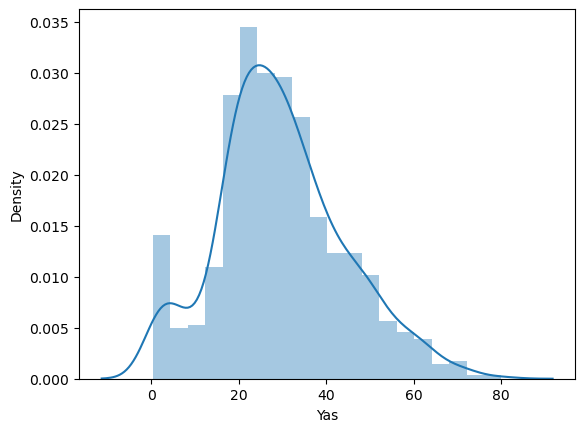

In [16]:
# Gemideki yas dağılımı
sns.distplot(train_data['Yas'])

In [17]:
train_data.isnull().sum()#her bir sutunda kaç tane boş değer olduğunu gösterir 

ID               0
HayataKalan      0
Sınıf            0
Isim             0
Cinsiyet         0
Yas            177
Eş               0
Aile Üyesi       0
Bilet            0
Ücret            0
Kabin          687
GirişKapısı      2
dtype: int64

<Axes: xlabel='Sınıf', ylabel='Yas'>

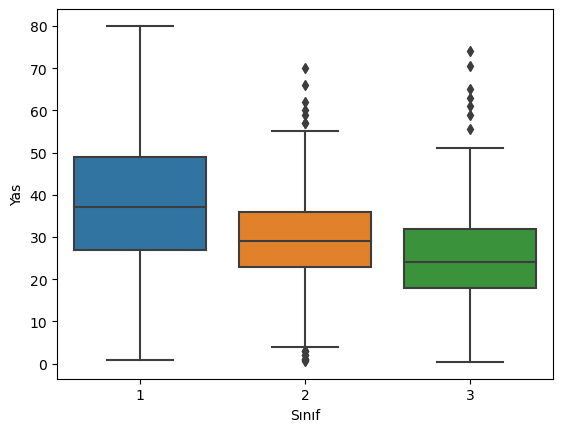

In [18]:
sns.boxplot(x='Sınıf',y='Yas',data=train_data)

In [19]:
# her sınıfa ait yas ortalamasını ayrı ayrı bulduk
print(train_data[train_data['Sınıf']==1]['Yas'].mean())
print(train_data[train_data['Sınıf']==2]['Yas'].mean())
print(train_data[train_data['Sınıf']==3]['Yas'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [20]:
# her sınıfa ayrı ayrı girip burada bulunan boş değerleri sınıflara göre bulunan ortalama değerler ile dolduracaz 
def fill_in_na_values(cols):# sutunları parametre olarak aldık
    Yas=cols[0] # yas 0 sutununa eşit
    Sınıf=cols[1] # sınıf 1 sutununa eşit 
    
    if pd.isnull(Yas):
        if Sınıf ==1:
            return round(train_data[train_data['Sınıf']==1]['Yas'].mean())
        elif Sınıf==2:
            return round(train_data[train_data['Sınıf']==2]['Yas'].mean())
        elif Sınıf==3:
            return round(train_data[train_data['Sınıf']==3]['Yas'].mean())
    else:
            return Yas
train_data['Yas']=train_data[['Yas','Sınıf']].apply(fill_in_na_values,axis=1)
        
train_data.isnull().sum()
        

ID               0
HayataKalan      0
Sınıf            0
Isim             0
Cinsiyet         0
Yas              0
Eş               0
Aile Üyesi       0
Bilet            0
Ücret            0
Kabin          687
GirişKapısı      2
dtype: int64

<Axes: >

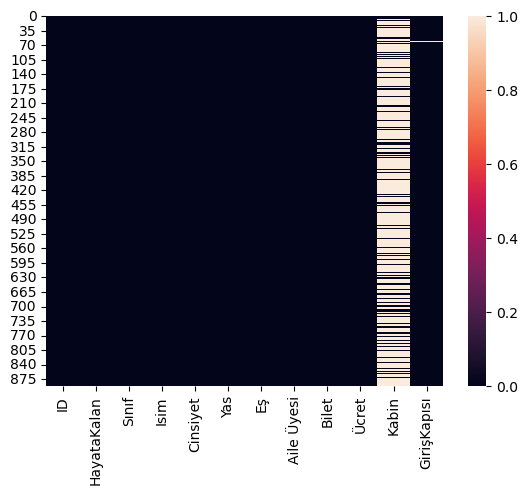

In [21]:
sns.heatmap(train_data.isnull())# boş değerlere ait ısı haritası 

In [22]:
train_data.drop(['Kabin'],axis=1,inplace=True)# çok fazla eksik değer olduğunu ısı haritası ile anladık ve kabin sutununu sildik

In [23]:
train_data.head()

,ID,HayataKalan,Sınıf,Isim,Cinsiyet,Yas,Eş,Aile Üyesi,Bilet,Ücret,GirişKapısı
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

ID             0
HayataKalan    0
Sınıf          0
Isim           0
Cinsiyet       0
Yas            0
Eş             0
Aile Üyesi     0
Bilet          0
Ücret          0
GirişKapısı    0
dtype: int64

In [25]:
train_data.drop(['ID','Isim','Bilet'],axis=1,inplace=True)# veri eğitiminde önemsiz olan sutunları kaldırdık 
train_data.head()


,HayataKalan,Sınıf,Cinsiyet,Yas,Eş,Aile Üyesi,Ücret,GirişKapısı
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
train_data['GirişKapısı'].unique()
#belirtilen sutunda kaç farklı değer var


array(['S', 'C', 'Q'], dtype=object)

In [29]:
Cinsiyet=pd.get_dummies(train_data['Cinsiyet'],drop_first=True)
#cinsiyet sutunu nu sayısal forma 'one hot encoding e yöntemi ile çevirir'

In [30]:
GirişKapısı=pd.get_dummies(train_data['GirişKapısı'],drop_first=True)
GirişKapısı #one hot encoding

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
train_data.drop(['Cinsiyet','GirişKapısı'],axis=1,inplace=True)#kaldırıldı
train_data=pd.concat([train_data,Cinsiyet,GirişKapısı],axis=1)#eklendi
train_data.head()
#burada yapılan one hot encoding ile sayısal forma dönüştürülen sutunlar dataframe üzerinden silinir sayısal formları tekrar 
#yeni halleri ile dataframe e eklenir 

,HayataKalan,Sınıf,Yas,Eş,Aile Üyesi,Ücret,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#verileri öleçeklendirme 